In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [11]:
import os


#print(os.getcwd())
os.chdir('/content/gdrive/My Drive/188/Project Stuff/Code')
!ls

 model.ipynb
'MoviesOnStreamingPlatforms_updated (1).csv'
 ogMoviesOnStreamingPlatforms_updated.csv
 ogMoviesOnStreamingPlatforms_updated.gsheet


In [68]:
import pandas as pd

ds = pd.read_csv("MoviesOnStreamingPlatforms_updated (1).csv")
ds = ds.iloc[:, 1:]    #remove unnamed index column
ds.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
1,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
2,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
3,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
4,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0


In [69]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5157 entries, 0 to 5156
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5157 non-null   object 
 1   Year             5157 non-null   int64  
 2   Age              3370 non-null   object 
 3   IMDb             5155 non-null   float64
 4   Rotten Tomatoes  5157 non-null   object 
 5   Netflix          5157 non-null   int64  
 6   Hulu             5157 non-null   int64  
 7   Prime Video      5157 non-null   int64  
 8   Disney+          5157 non-null   int64  
 9   Type             5157 non-null   int64  
 10  Directors        5051 non-null   object 
 11  Genres           5152 non-null   object 
 12  Country          5138 non-null   object 
 13  Language         5110 non-null   object 
 14  Runtime          5121 non-null   float64
dtypes: float64(2), int64(6), object(7)
memory usage: 604.5+ KB


In [70]:
ds.drop(['Age'], axis =1, inplace=True)
ds.dropna(subset=['IMDb', 'Directors', 'Genres', 'Country', 'Language', 'Runtime'], inplace = True)
ds.reset_index(inplace=True, drop=True)
ds.Year = ds.Year.astype("object")
ds['Rotten Tomatoes'] = ds['Rotten Tomatoes'].str.rstrip('%').astype('float') / 100.0
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5000 non-null   object 
 1   Year             5000 non-null   object 
 2   IMDb             5000 non-null   float64
 3   Rotten Tomatoes  5000 non-null   float64
 4   Netflix          5000 non-null   int64  
 5   Hulu             5000 non-null   int64  
 6   Prime Video      5000 non-null   int64  
 7   Disney+          5000 non-null   int64  
 8   Type             5000 non-null   int64  
 9   Directors        5000 non-null   object 
 10  Genres           5000 non-null   object 
 11  Country          5000 non-null   object 
 12  Language         5000 non-null   object 
 13  Runtime          5000 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 547.0+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


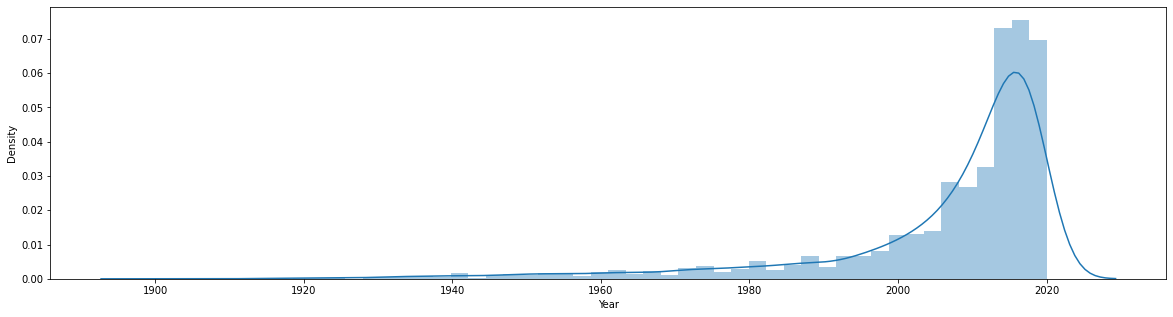

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 5))
sns.distplot(ds['Year'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


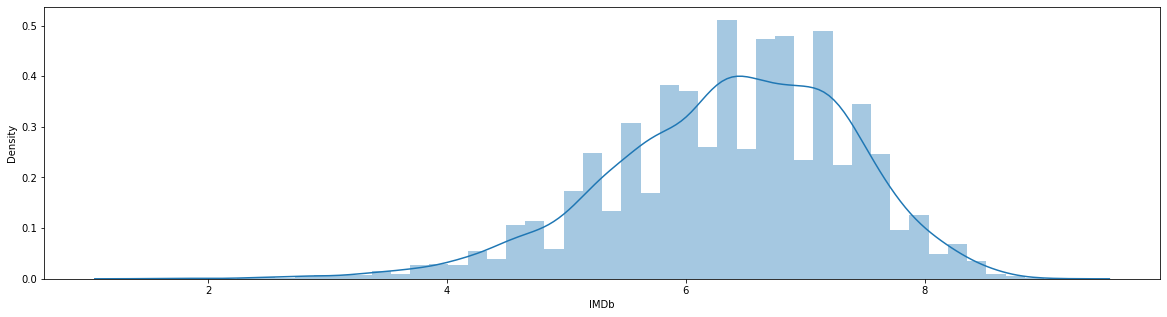

In [72]:
plt.figure(figsize = (20,5))
sns.distplot(ds['IMDb'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


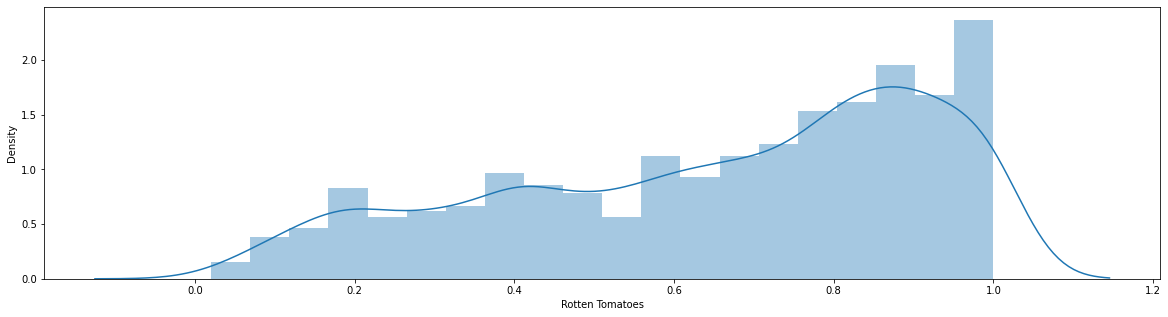

In [73]:
plt.figure(figsize = (20,5))
sns.distplot(ds['Rotten Tomatoes'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


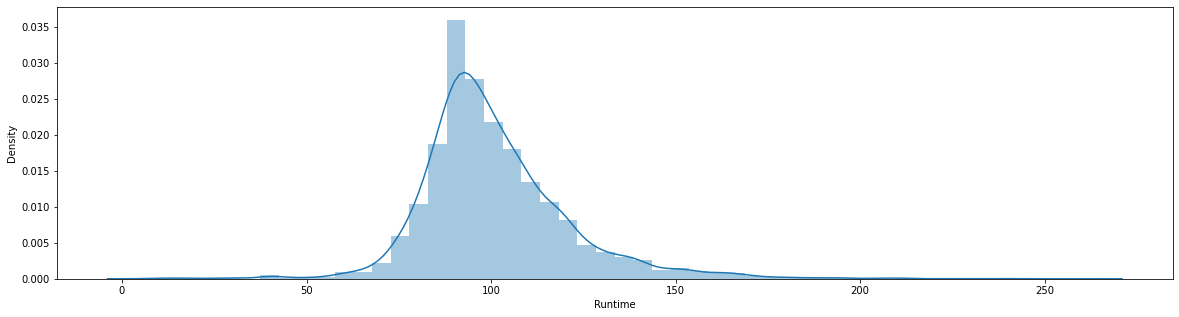

In [74]:
plt.figure(figsize = (20,5))
sns.distplot(ds['Runtime'])
plt.show()

In [75]:
def movie_count(platform, count=False):
    if count==False:
        print('Platform {} Count : {}'.format(platform, ds[platform].sum()))
        
    else:
        return ds[platform].sum()

In [76]:
movie_count('Netflix')
movie_count('Prime Video')
movie_count('Disney+')
movie_count('Hulu')

Platform Netflix Count : 1386
Platform Prime Video Count : 2971
Platform Disney+ Count : 342
Platform Hulu Count : 617


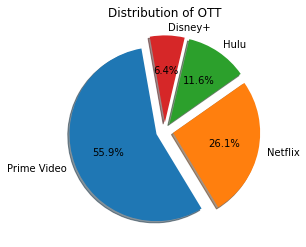

In [77]:
platform = 'Prime Video', 'Netflix', 'Hulu', 'Disney+'
s = [movie_count('Prime Video', count = True),
     movie_count('Netflix', count = True),
     movie_count('Hulu', count = True),
     movie_count('Disney+', count = True),
    ]

explode= (0.1, 0.1, 0.1, 0.1)

#plot
fig1, ax1 = plt.subplots()
ax1.pie(s, 
       labels = platform,
       autopct = '%1.1f%%',
       explode = explode,
       shadow = True,
       startangle=100)

ax1.axis = ('equal')
plt.title('Distribution of OTT')
plt.show()

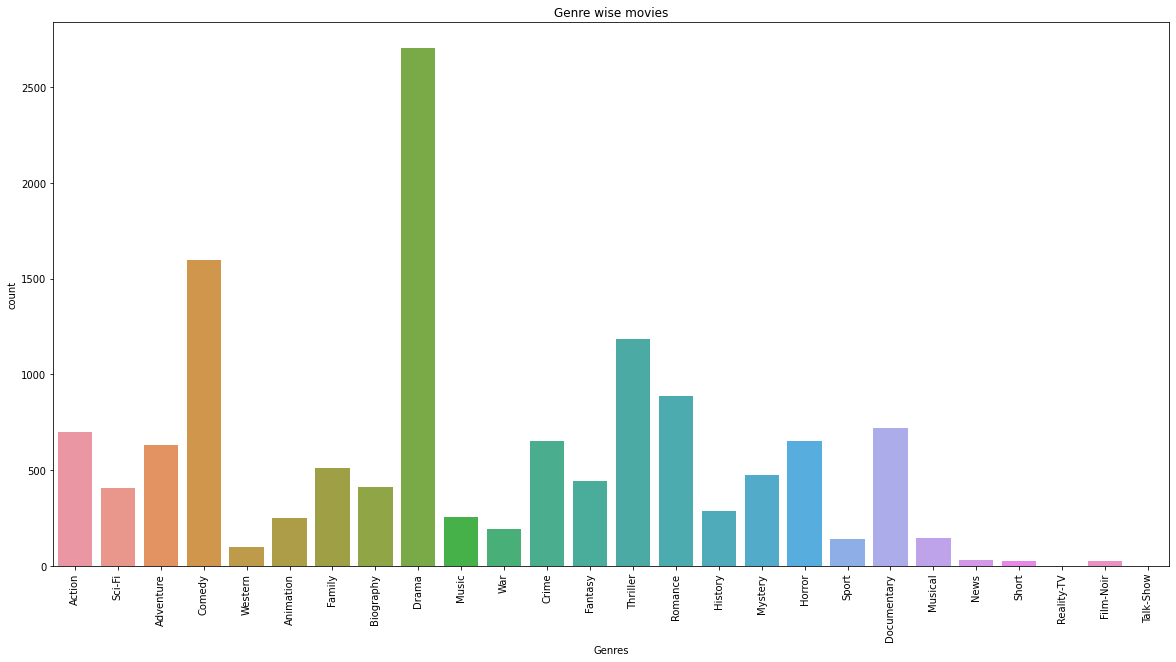

In [78]:
g = ds['Genres'].str.split(',').apply(pd.Series,1).stack()

g.index = g.index.droplevel(-1)

#assign name
g.name = 'Genres'

#delete column
del ds['Genres']

#join new column
ds_genres = ds.join(g)

plt.figure(figsize=(20,10))
sns.countplot(x='Genres', data = ds_genres)
plt.xticks(rotation=90)
plt.title("Genre wise movies")
plt.show()

In [79]:
c = ds['Country'].str.split(',').apply(pd.Series, 1).stack()
c.index = c.index.droplevel(-1)

#assign name
c.name = 'Country'

#delete column
del ds['Country']

ds_country = ds.join(c)

ds_country.head()

,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Language,Runtime,Country
0,The Matrix,1999,8.7,0.87,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski",English,136.0,United States
1,Avengers: Infinity War,2018,8.5,0.84,1,0,0,0,0,"Anthony Russo,Joe Russo",English,149.0,United States
2,Back to the Future,1985,8.5,0.96,1,0,0,0,0,Robert Zemeckis,English,116.0,United States
3,"The Good, the Bad and the Ugly",1966,8.8,0.97,1,0,1,0,0,Sergio Leone,Italian,161.0,Italy
3,"The Good, the Bad and the Ugly",1966,8.8,0.97,1,0,1,0,0,Sergio Leone,Italian,161.0,Spain


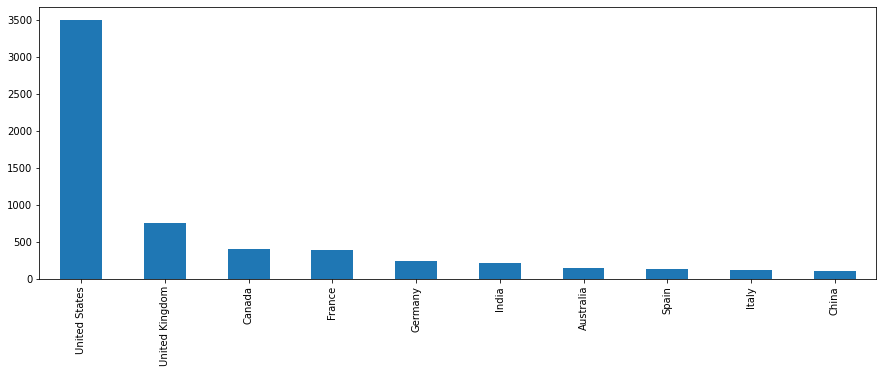

In [80]:
ds_country['Country'].value_counts()[:10].plot(kind="bar", figsize=(15,5))
plt.show()

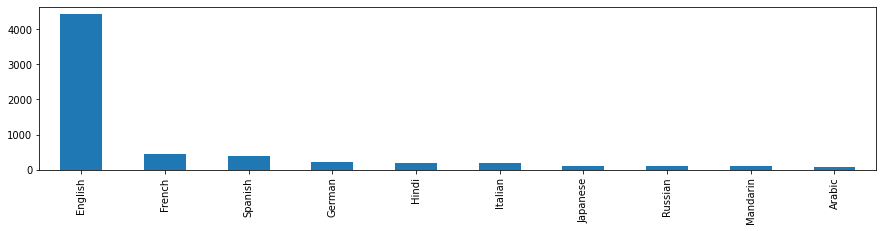

In [81]:
l = ds['Language'].str.split(',').apply(pd.Series,1).stack()

l.index = l.index.droplevel(-1)

l.name = "Language"

del ds['Language']

ds_language = ds.join(l)

ds_language['Language'].value_counts()[:10].plot(kind = 'bar', figsize =(15,3))
plt.show()

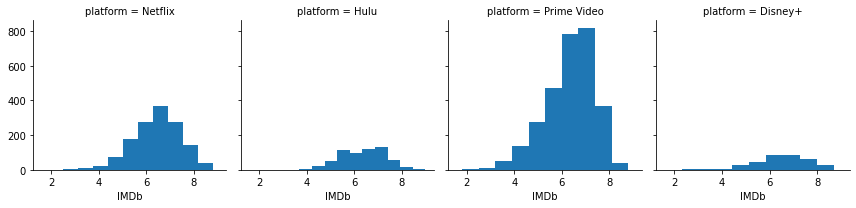

In [83]:
ds_Imdb = pd.melt(ds, id_vars = ['Title', 'Year', 'IMDb', 'Rotten Tomatoes', 'Type', 'Runtime'], var_name = 'platform')

ds_Imdb = ds_Imdb[ds_Imdb.value==1]
ds_Imdb.drop(columns=["value"], axis=1, inplace=True)

g = sns.FacetGrid(ds_Imdb, col="platform")
g.map(plt.hist, "IMDb")
plt.show()

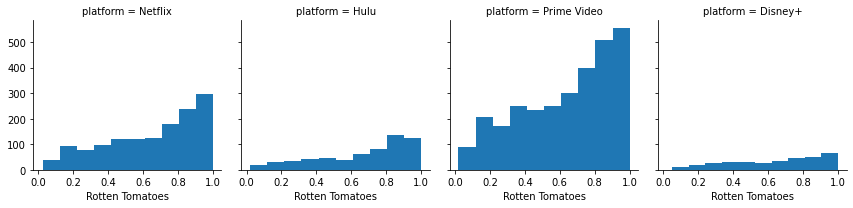

In [84]:
ds_RT = pd.melt(ds, id_vars = ['Title', 'Year', 'IMDb', 'Rotten Tomatoes', 'Type', 'Runtime'], var_name = 'platform')

ds_RT = ds_RT[ds_RT.value==1]
ds_RT.drop(columns=["value"], axis=1, inplace=True)

g = sns.FacetGrid(ds_RT, col="platform")
g.map(plt.hist, "Rotten Tomatoes")
plt.show()

In [88]:
ds = pd.read_csv("MoviesOnStreamingPlatforms_updated (1).csv")
ds=ds.iloc[:,1:]

# melting platform columns to create visualization
ds2 = pd.melt(ds, id_vars=["Title","Year","Age","IMDb","Rotten Tomatoes","Type","Runtime"], var_name="platform")
ds2 = ds2[ds2.value==1]
ds2.drop(columns=["value"],axis=1,inplace=True)

ds2.head(5)

,Title,Year,Age,IMDb,Rotten Tomatoes,Type,Runtime,platform
0,The Matrix,1999,18+,8.7,87%,0,136.0,Netflix
1,Avengers: Infinity War,2018,13+,8.5,84%,0,149.0,Netflix
2,Back to the Future,1985,7+,8.5,96%,0,116.0,Netflix
3,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,0,161.0,Netflix
4,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,0,117.0,Netflix


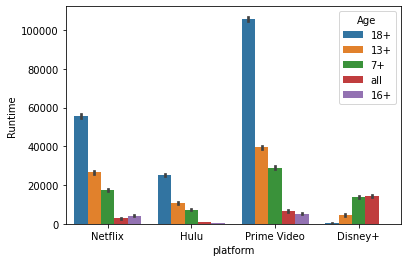

In [89]:
ax = sns.barplot(x="platform", y="Runtime",hue="Age", estimator=sum, data=ds2)